# Part A. Quick basics

# A1. Spot the right scaler
Apartment_price_BDT with a few luxury penthouses-> Robust Scaling

Skin_temperature_C measured from a wearable between 30 and 36 -> Min-Max Scaler

Daily_app_opens with many zeros and a few power users-> tandardization (Z-Score Scaling)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A2. Manual Min-Max on a tiny set

In [2]:

dataframe_scores = pd.DataFrame({'scores': [20, 25, 30, 50]})
dataframe_scores

,scores
0,20
1,25
2,30
3,50


In [3]:
minimum_values = dataframe_scores.min()
maximum_values = dataframe_scores.max()
range_values = maximum_values - minimum_values

minimum_values, maximum_values, range_values

(scores    20
 dtype: int64,
 scores    50
 dtype: int64,
 scores    30
 dtype: int64)

In [4]:
shifted_scores = dataframe_scores - minimum_values
shifted_scores

,scores
0,0
1,5
2,10
3,30


In [5]:
min_max_scaled_scores = shifted_scores / range_values
min_max_scaled_scores.round(3)

,scores
0,0.000
1,0.167
2,0.333
3,1.000


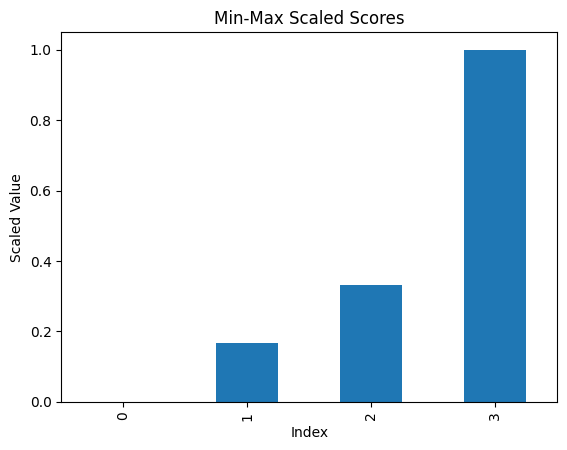

In [6]:
min_max_scaled_scores.plot(kind='bar', title='Min-Max Scaled Scores', legend=False)
plt.xlabel("Index")
plt.ylabel("Scaled Value")
plt.show()

# A3. Z-scores on a subset

In [7]:
dataframe_x = pd.DataFrame({'x': [8, 9, 11]})
print(dataframe_x)


    x
0   8
1   9
2  11


In [8]:
mean_x = dataframe_x['x'].mean()
print("Mean =", mean_x)

# SD
population_std_x = dataframe_x['x'].std(ddof=0)
print("SD of x =", population_std_x)

# Z-scores
z_scores_x = (dataframe_x['x'] - mean_x) / population_std_x
print(z_scores_x)


Mean = 9.333333333333334
SD of x = 1.247219128924647
0   -1.069045
1   -0.267261
2    1.336306
Name: x, dtype: float64


In [9]:
dataframe_z_scores = pd.DataFrame({
    'x': dataframe_x['x'],
    'Z-score': z_scores_x.round(3)
})
print(dataframe_z_scores)


    x  Z-score
0   8   -1.069
1   9   -0.267
2  11    1.336


A4. Robust scaling ingredients

In [10]:
dataframe_y = pd.DataFrame({'y': [5, 6, 6, 7, 50]})
print(dataframe_y)

    y
0   5
1   6
2   6
3   7
4  50


In [11]:
median_y = dataframe_y['y'].median()
Q1 = dataframe_y['y'].quantile(0.25)
Q3 = dataframe_y['y'].quantile(0.75)
IQR = Q3 - Q1

median_y,Q1, Q3, IQR

(6.0, np.float64(6.0), np.float64(7.0), np.float64(1.0))

In [12]:
robust_scaling = pd.DataFrame({
    'Statistic': ['Q1', 'Median (Q2)', 'Q3', 'IQR'],
    'Value': [Q1, median_y, Q3, IQR]
})
robust_scaling

,Statistic,Value
0,Q1,6.0
1,Median (Q2),6.0
2,Q3,7.0
3,IQR,1.0


A5. Nominal or ordinal

In [13]:
topics = {
    "T-shirt_size": ["S", "M", "L", "XL"],
    "City": ["Dhaka", "Chattogram", "Rajshahi"],
    "Satisfaction": ["Low", "Medium", "High"]
}

topic_types = {
    "T-shirt_size": "Ordinal",
    "City": "Nominal",
    "Satisfaction": "Ordinal"
}

for feature, ftype in topic_types.items():
    print(f"Feature: {feature}, Type: {ftype}")


Feature: T-shirt_size, Type: Ordinal
Feature: City, Type: Nominal
Feature: Satisfaction, Type: Ordinal


# Part B. Hands on practice

B1. Three scalers side by side

In [14]:
import pandas as pd
import numpy as np

Heights = [150, 160, 170, 175, 180]
Weights = [58, 62, 65, 66, 190]

df = pd.DataFrame({
    "Height": Heights,
    "Weight": Weights
})

print(df)


   Height  Weight
0     150      58
1     160      62
2     170      65
3     175      66
4     180     190


In [15]:
# a) Min-Max Scaling to [0, 1]

min_height = df['Height'].min()
max_height = df['Height'].max()
min_weight = df['Weight'].min()
max_weight = df['Weight'].max()

df_minmax_scaled = pd.DataFrame({
    'Height_scaled': (df['Height'] - min_height) / (max_height - min_height),
    'Weight_scaled': (df['Weight'] - min_weight) / (max_weight - min_weight)
})

print("Min-Max Scaled Data:")
print(df_minmax_scaled.round(3))


Min-Max Scaled Data:
   Height_scaled  Weight_scaled
0          0.000          0.000
1          0.333          0.030
2          0.667          0.053
3          0.833          0.061
4          1.000          1.000


In [16]:
 # b) Standardize the first three values of each only

 # Take first three values
height_subset = df['Height'][:3]
weight_subset = df['Weight'][:3]

# Mean and population std
mean_height = height_subset.mean()
std_height = height_subset.std(ddof=0)
mean_weight = weight_subset.mean()
std_weight = weight_subset.std(ddof=0)

# Z-score
height_z = (height_subset - mean_height) / std_height
weight_z = (weight_subset - mean_weight) / std_weight

df_z_subset = pd.DataFrame({
    'Height_Z': height_z.round(3),
    'Weight_Z': weight_z.round(3)
})

print("\n(b) Z-score for first three values:")
print(df_z_subset)



(b) Z-score for first three values:
   Height_Z  Weight_Z
0    -1.225    -1.279
1     0.000     0.116
2     1.225     1.162


In [17]:
 # c) Robust scale Weights with median and IQR

median_weight = df['Weight'].median()

# Q1, Q3
Q1_weight = df['Weight'].quantile(0.25)
Q3_weight = df['Weight'].quantile(0.75)

#IQR
IQR_weight = Q3_weight - Q1_weight

# Robust scaling
weight_robust_scaled = (df['Weight'] - median_weight) / IQR_weight

df_robust = pd.DataFrame({
    'Weight_Robust_Scaled': weight_robust_scaled.round(3)
})

print("\n(c) Robust Scaled Weights:")
print(df_robust)



(c) Robust Scaled Weights:
   Weight_Robust_Scaled
0                 -1.75
1                 -0.75
2                  0.00
3                  0.25
4                 31.25


d) One line on which scaler handles the outlier best

ans : Robust Scaler handles the outlier best because it uses median and IQR, which are less sensitive to extreme values.

B2. One-hot by hand

In [18]:
Cities = ["Dhaka", "Chattogram", "Dhaka", "Rajshahi", "Rajshahi"]
df = pd.DataFrame({"City": Cities})
print(df)

         City
0       Dhaka
1  Chattogram
2       Dhaka
3    Rajshahi
4    Rajshahi


In [19]:
df_encoded = pd.get_dummies(df, columns=["City"], prefix="City", dtype=int)

print(df_encoded)

   City_Chattogram  City_Dhaka  City_Rajshahi
0                0           1              0
1                1           0              0
2                0           1              0
3                0           0              1
4                0           0              1


B3. Ordinal mapping

In [21]:
Education = ["High School", "Bachelor", "Master", "Bachelor", "Master"]
df = pd.DataFrame({"Education": Education})
print(df)

     Education
0  High School
1     Bachelor
2       Master
3     Bachelor
4       Master


In [23]:
edu_map1 = {"High School":0, "Bachelor":1, "Master":2}
df["Education_Mapped_1"] = df["Education"].map(edu_map1)

print("Mapped Education:")
print(df)

Mapped Education:
     Education  Education_Mapped_1
0  High School                   0
1     Bachelor                   1
2       Master                   2
3     Bachelor                   1
4       Master                   2


In [24]:
edu_map2 = {"High School":1, "Bachelor":2, "Master":3}
df["Education_Mapped_2"] = df["Education"].map(edu_map2)

print("Mapped Education:")
print(df)

Mapped Education:
     Education  Education_Mapped_1  Education_Mapped_2
0  High School                   0                   1
1     Bachelor                   1                   2
2       Master                   2                   3
3     Bachelor                   1                   2
4       Master                   2                   3


B6. Two distances, different vibes

In [25]:
P = np.array([
    [2, 3],   # P1
    [5, 7],   # P2
    [2, 10],  # P3
], dtype=float)

pairs = [
    (0, 1, "P1-P2"),
    (0, 2, "P1-P3"),
    (1, 2, "P2-P3")
]

# Euclidean distances
eu = np.array([
    np.linalg.norm(P[i] - P[j]) for i, j, _ in pairs
])
print("Euclidean:", np.round(eu, 3).tolist())

# Manhattan distances
ma = np.array([
    np.linalg.norm(P[i] - P[j], ord=1) for i, j, _ in pairs
])
print("Manhattan:", ma.tolist())


Euclidean: [5.0, 7.0, 4.243]
Manhattan: [7.0, 7.0, 6.0]


Part C. Mini datasets
# New section

Income_BDT-> Robust
Reason: Outlier present, median/IQR robust

Transactions-> Standardization
Reason: Small integers, preserve relative differences

Temp_C-> Min-Max
Reason: Small bounded range


In [26]:
df2 = pd.DataFrame({
    "ID": [1,2,3,4,5],
    "Income_BDT": [30000, 45000, 52000, 300000, 38000],
    "Transactions": [0,1,2,12,0],
    "Temp_C": [25.0, 26.0, 24.5, 28.0, 25.5],
    "Education": ["High School","Bachelor","Master","Bachelor","Master"],
    "Satisfaction": ["Low","Medium","High","Medium","Medium"]
})
df2

,ID,Income_BDT,Transactions,Temp_C,Education,Satisfaction
0,1,30000,0,25.0,High School,Low
1,2,45000,1,26.0,Bachelor,Medium
2,3,52000,2,24.5,Master,High
3,4,300000,12,28.0,Bachelor,Medium
4,5,38000,0,25.5,Master,Medium


In [27]:
median_income = df2["Income_BDT"].median()
q1_income = df2["Income_BDT"].quantile(0.25)
q3_income = df2["Income_BDT"].quantile(0.75)
IQR_income = q3_income - q1_income

median_income, q1_income, q3_income, IQR_income

(45000.0, np.float64(38000.0), np.float64(52000.0), np.float64(14000.0))

In [29]:
df2["Income_RobustScaled"] = (df2["Income_BDT"] - median_income)/IQR_income
print(df2[["Income_BDT","Income_RobustScaled"]].round(2))

   Income_BDT  Income_RobustScaled
0       30000                -1.07
1       45000                 0.00
2       52000                 0.50
3      300000                18.21
4       38000                -0.50


In [30]:
#Transactions

mean_transaction = df2["Transactions"].mean()
std_transaction = df2["Transactions"].std()

df2["Transactions_Zscore"] = (df2["Transactions"] - mean_transaction)/std_transaction

print(df2[["Transactions","Transactions_Zscore"]].round(2))


   Transactions  Transactions_Zscore
0             0                -0.59
1             1                -0.39
2             2                -0.20
3            12                 1.77
4             0                -0.59


In [32]:
#Temp_C
min_temp = df2["Temp_C"].min()
max_temp = df2["Temp_C"].max()
range_temp = max_temp - min_temp

df2["Temp_MinMax"] = (df2["Temp_C"] - min_temp)/range_temp

print(df2[["Temp_C","Temp_MinMax"]].round(3))


   Temp_C  Temp_MinMax
0    25.0        0.143
1    26.0        0.429
2    24.5        0.000
3    28.0        1.000
4    25.5        0.286
